<a href="https://colab.research.google.com/github/amsha16/MachineLearningTF/blob/master/2_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [0]:
df=pd.read_csv('train_loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None, (614, 13))

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



**Continous variables**
* CoapplicantIncome
* ApplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History

**Categorical Variables**
* Loan_ID
* Gender
* Married
* Dependents
* Eduaction
* Self_Employed
* Property_area

**Target**
* Loan_Status


Missing Values Treatment

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [0]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

Drop categorical missing values

In [0]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            542 non-null    object 
 1   Gender             542 non-null    object 
 2   Married            542 non-null    object 
 3   Dependents         542 non-null    object 
 4   Education          542 non-null    object 
 5   Self_Employed      542 non-null    object 
 6   ApplicantIncome    542 non-null    int64  
 7   CoapplicantIncome  542 non-null    float64
 8   LoanAmount         542 non-null    float64
 9   Loan_Amount_Term   542 non-null    float64
 10  Credit_History     542 non-null    float64
 11  Property_Area      542 non-null    object 
 12  Loan_Status        542 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.3+ KB


(None, (542, 13))

In [0]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

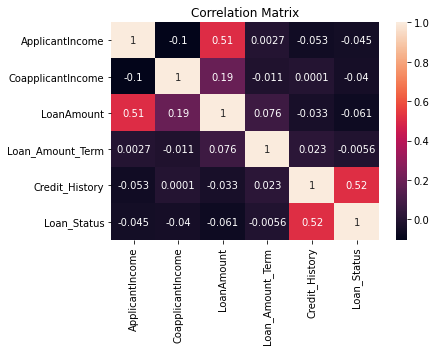

In [16]:
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

In [0]:
df1=df.drop(labels=['ApplicantIncome'],axis=1)
df1=df1.drop(labels=['CoapplicantIncome'],axis=1)
df1=df1.drop(labels=['LoanAmount'],axis=1)
df1=df1.drop(labels=['Loan_Amount_Term'],axis=1)
df1=df1.drop(labels=['Loan_ID'],axis=1)



In [0]:
df1 = df1.astype({'Credit_History':int})

In [57]:
df1.tail()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,1,Rural,1
610,Male,Yes,3+,Graduate,No,1,Rural,1
611,Male,Yes,1,Graduate,No,1,Urban,1
612,Male,Yes,2,Graduate,No,1,Urban,1
613,Female,No,0,Graduate,Yes,0,Semiurban,0


In [58]:
df1['Dependents'].value_counts()

0     309
1      94
2      94
3+     45
Name: Dependents, dtype: int64

In [59]:
df1['Education'].value_counts()

Graduate        425
Not Graduate    117
Name: Education, dtype: int64

In [60]:
df1['Property_Area'].value_counts()

Semiurban    209
Urban        174
Rural        159
Name: Property_Area, dtype: int64

In [61]:
df1['Self_Employed'].value_counts()

No     467
Yes     75
Name: Self_Employed, dtype: int64

In [62]:
train, test = train_test_split(df1, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


346 train examples
87 validation examples
109 test examples


In [0]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Loan_Status')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)



Converting categorical variables into continuous variables.


In [0]:
feature_columns = []

Gender1 = feature_column.categorical_column_with_vocabulary_list(
      'Gender', ['Female', 'Male'])
Gender_one_hot = feature_column.indicator_column(Gender1)
feature_columns.append(Gender_one_hot)

In [0]:
Married1 = feature_column.categorical_column_with_vocabulary_list(
      'Married', ['No', 'Yes'])
Married_one_hot = feature_column.indicator_column(Married1)
feature_columns.append(Married_one_hot)

In [0]:
Dependents1 = feature_column.categorical_column_with_vocabulary_list(
      'Dependents', ['0', '1', '2','3+'])
Dependents_one_hot = feature_column.indicator_column(Dependents1)
feature_columns.append(Dependents_one_hot)

In [0]:
Education1 = feature_column.categorical_column_with_vocabulary_list(
      'Education', ['Graduate', 'Not Graduate'])
Education_one_hot = feature_column.indicator_column(Education1)
feature_columns.append(Education_one_hot)

In [0]:
Self_Employed1 = feature_column.categorical_column_with_vocabulary_list(
      'Self_Employed', ['Yes', 'No'])
Self_Employed_one_hot = feature_column.indicator_column(Self_Employed1)
feature_columns.append(Self_Employed_one_hot)

In [0]:
Credit_History1 = feature_column.categorical_column_with_vocabulary_list(
      'Credit_History', [1, 0])
Credit_History_one_hot = feature_column.indicator_column(Credit_History1)
feature_columns.append(Credit_History_one_hot)

In [0]:
Property_Area1 = feature_column.categorical_column_with_vocabulary_list(
      'Property_Area', ['Urban', 'Rural','Semiurban'])
Property_Area_one_hot = feature_column.indicator_column(Property_Area1)
feature_columns.append(Property_Area_one_hot)

In [83]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Gender', vocabulary_list=('Female', 'Male'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Married', vocabulary_list=('No', 'Yes'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Dependents', vocabulary_list=('0', '1', '2', '3+'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Education', vocabulary_list=('Graduate', 'Not Graduate'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Self_Employed', vocabulary_list=('Yes', 'No'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Credit_History', vocabulary_list=(1, 0)

Create a feature layer

In [0]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [0]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


Create, compile, and train the model

In [103]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(8, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)


Epoch 1/10
11/11 [==============================] - 0s 27ms/step - loss: 0.6436 - accuracy: 0.4191 - val_loss: 0.6566 - val_accuracy: 0.3908
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.6012 - val_loss: 0.6475 - val_accuracy: 0.6897
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7168 - val_loss: 0.6379 - val_accuracy: 0.6897
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.6850 - val_loss: 0.6281 - val_accuracy: 0.7356
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7023 - val_loss: 0.6192 - val_accuracy: 0.7471
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7341 - val_loss: 0.6080 - val_accuracy: 0.7701
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.7225 - val_loss: 0.5996 - val_accuracy: 0.7701
Epoch 8/10
11/11 [=

In [104]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7706
Accuracy 0.7706422209739685
